In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid") 
 


In [2]:
data = pd.read_csv('ipl match.csv')
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18/04/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19/04/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19/04/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20/04/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20/04/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# most   winner team

Winners                    
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Sunrisers Hyderabad             66
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


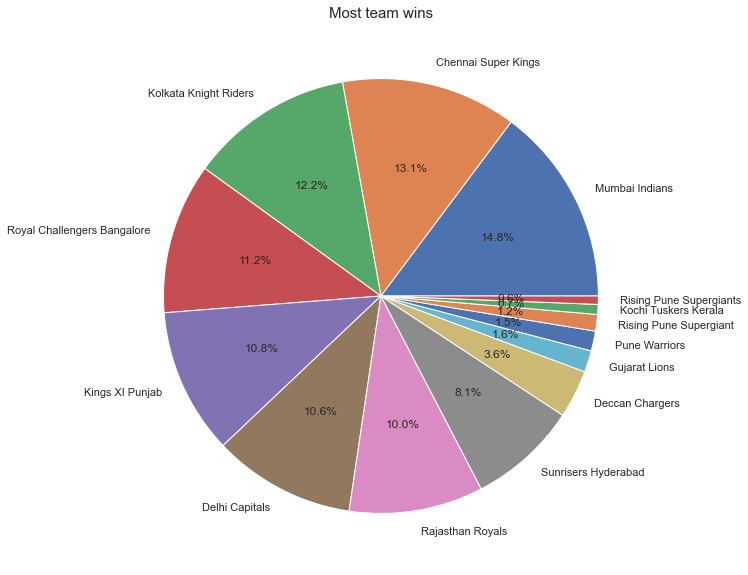

In [4]:
temp = pd.DataFrame({'Winners':data['winner']})
 
count_wins = temp.value_counts()
print(count_wins)
label = [x[0] for x in count_wins.keys()]
        
bar,ax = plt.subplots(figsize=(20,10))
ax = plt.pie(count_wins,autopct='%0.1f%%' ,labels=label)
plt.title('Most team wins',fontsize=15)
plt.show()
 



 

# most win in eliminator

C:\Users\dhava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


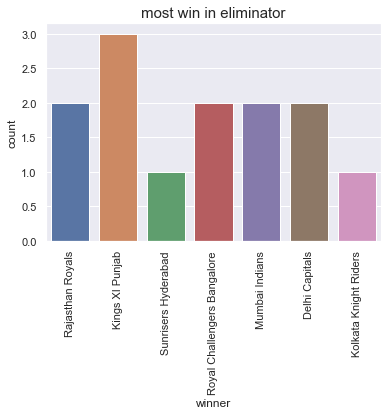

In [5]:

sns.countplot(data['winner'][data['eliminator']=='Y'] ,data=data )

plt.title("most win in eliminator",fontsize=15)
plt.xticks(rotation=90)
plt.show()

# toss dicision in  every  team

In [6]:
teams=data['toss_winner'].unique()     #unique means all value print only unique value

decision_making = pd.DataFrame([],columns=['Toss Winner','Decision','Times'])

for id,element in enumerate(teams):
    choose_bat = data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
    choose_field = data[(data['toss_winner']==element) & (data['toss_decision']=='field')]
    
    decision_making = decision_making.append({'Toss Winner':element,
                                             'Decision':'bat','Times':choose_bat['toss_winner'].count()},ignore_index=True)
    decision_making = decision_making.append({'Toss Winner':element,
                                             'Decision':'field','Times':choose_field['toss_winner'].count()},ignore_index=True)

In [7]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


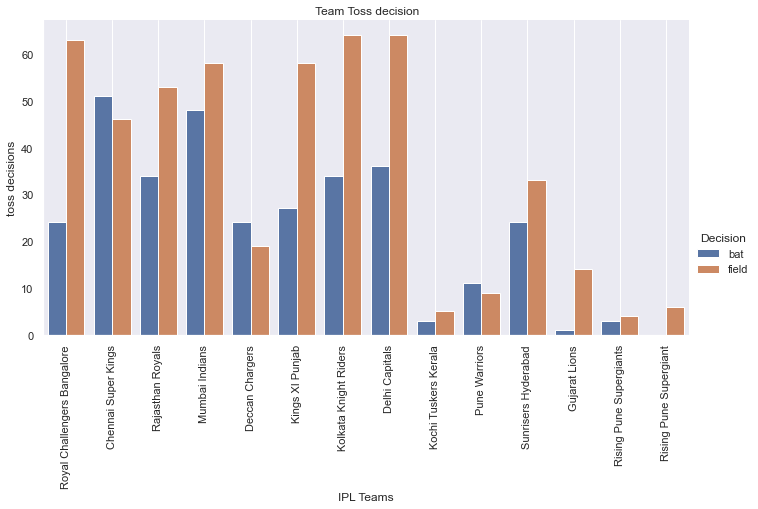

In [8]:
sns.catplot(x='Toss Winner',y='Times',hue='Decision' , data=decision_making , kind='bar', height=5,aspect=2)
plt.xticks(rotation=90)
plt.title(' Team Toss decision')
plt.xlabel('IPL Teams')
plt.ylabel('toss decisions')

plt.grid()
plt.show()

In [9]:


decision_making = pd.DataFrame(columns=['Decision','Times'])

 
choose_bat = data[(data['toss_decision']=='bat')]
choose_field = data[(data['toss_decision']=='field')]
    
decision_making = decision_making.append({'Decision':'bat','Times':choose_bat['toss_decision'].count()},ignore_index=True)
decision_making = decision_making.append({'Decision':'field','Times':choose_field['toss_decision'].count()},ignore_index=True)

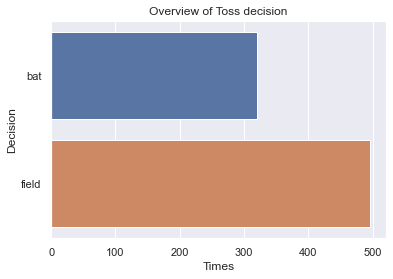

In [10]:
sns.barplot(x='Times',y='Decision',data=decision_making)
plt.title('Overview of Toss decision')
 
plt.show()

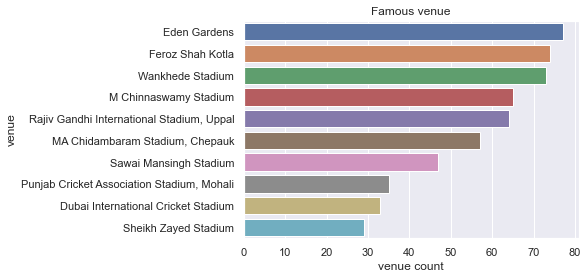

In [11]:
 
sns.barplot(x=data['venue'].value_counts().head(10).values,
           y=data['venue'].value_counts().head(10).index
           ,data = data)

 

plt.title('Famous venue')
plt.xlabel('venue count')
plt.ylabel('venue')

 
plt.show()

# top 6 umpire1 

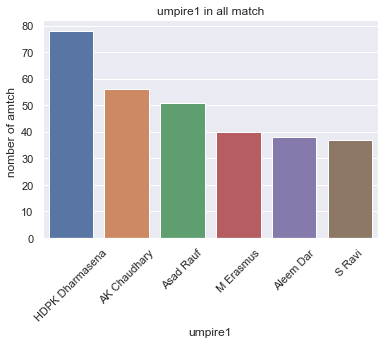

In [12]:
sns.barplot(x=data['umpire1'].value_counts().head(6).index,
           y=data['umpire1'].value_counts().head(6).values,
           data=data)

plt.xticks(rotation=45)
plt.xlabel('umpire1')
plt.ylabel('nomber of amtch ')
plt.title('umpire1 in all match')

plt.show()

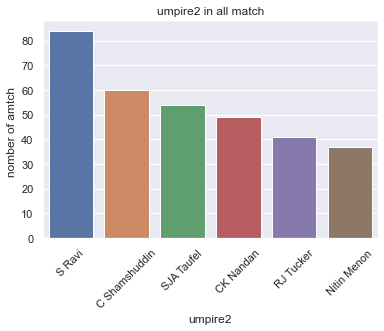

In [13]:
sns.barplot(x=data['umpire2'].value_counts().head(6).index,
           y=data['umpire2'].value_counts().head(6).values,
           data=data)

plt.xticks(rotation=45)
plt.xlabel('umpire2')
plt.ylabel('nomber of amtch ')
plt.title('umpire2 in all match')

plt.show()

# top 10  player of match

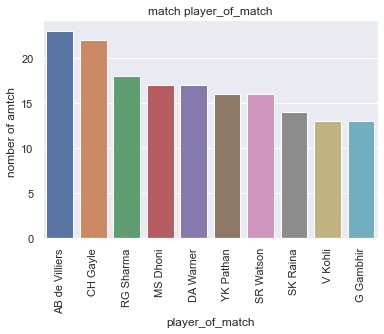

In [14]:
sns.barplot(x=data['player_of_match'].value_counts().head(10).index,
           y=data['player_of_match'].value_counts().head(10).values, 
           data=data)

plt.xticks(rotation=90)
plt.xlabel('player_of_match')
plt.ylabel('nomber of amtch ')
plt.title('match player_of_match')


plt.show()

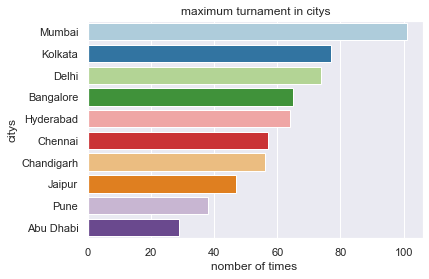

In [15]:
sns.color_palette("flare", as_cmap=True)
sns.barplot(x=data['city'].value_counts().head(10).values,
            y=data['city'].value_counts().head(10).index,palette="Paired",
            data=data)


plt.xlabel('nomber of times ')
plt.ylabel('citys')
plt.title('maximum turnament in citys')

 
plt.show()

# Batsman Runs analysis

In [16]:
runs = pd.read_csv('most_runs_average_strikerate.csv')
runs.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


-->Top 10 most runs batsman

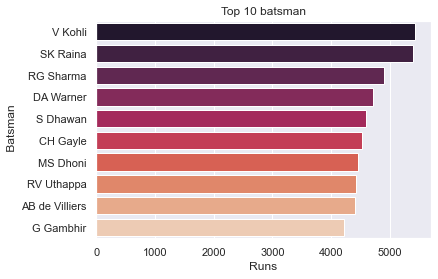

In [17]:
sns.barplot(y=runs['batsman'].head(10),x=runs['total_runs'].head(10),palette="rocket" , 
           data=runs)

plt.xlabel('Runs')
plt.ylabel(' Batsman')
plt.title('Top 10 batsman')

plt.show()

*** top five avg. strikerate bastman

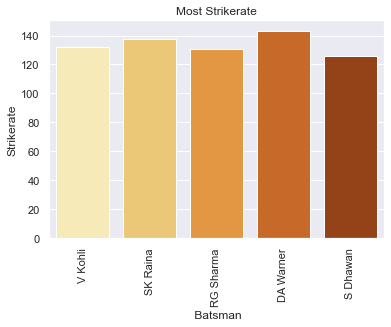

In [18]:
# plt.figure(figsize=(10,8))
sns.barplot(x=runs['batsman'].head(5),y=runs['strikerate'].head(5),palette="YlOrBr",
           data=runs)
plt.xticks(rotation=90)

plt.xlabel(' Batsman')
plt.ylabel('Strikerate')
plt.title('Most Strikerate')
plt.show()

# players detail

In [19]:
playear = pd.read_csv('Players.csv')
playear.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,24-02-91,Right_Hand,Right-arm medium,India
1,A Chandila,05-12-83,Right_Hand,Right-arm offbreak,India
2,A Chopra,19-09-77,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaN,Right_Hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaN,Right_Hand,Right-arm offbreak,NaN


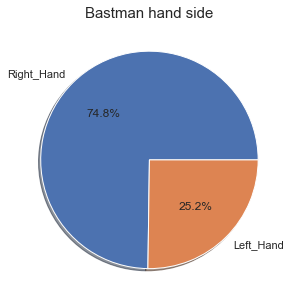

In [20]:



temp = pd.DataFrame({'hand':playear['Batting_Hand']})
hands= temp.value_counts()
 
label = [x[0] for x in hands.keys()]
        
bar,ax = plt.subplots(figsize=(10,5))
ax = plt.pie(hands,autopct='%0.1f%%' ,labels=label,shadow=True,)
plt.title('Bastman hand side',fontsize=15)
plt.show()
 

# Teamwise Home away

In [21]:
home_away = pd.read_csv('teamwise_home_and_away.csv')
home_away.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


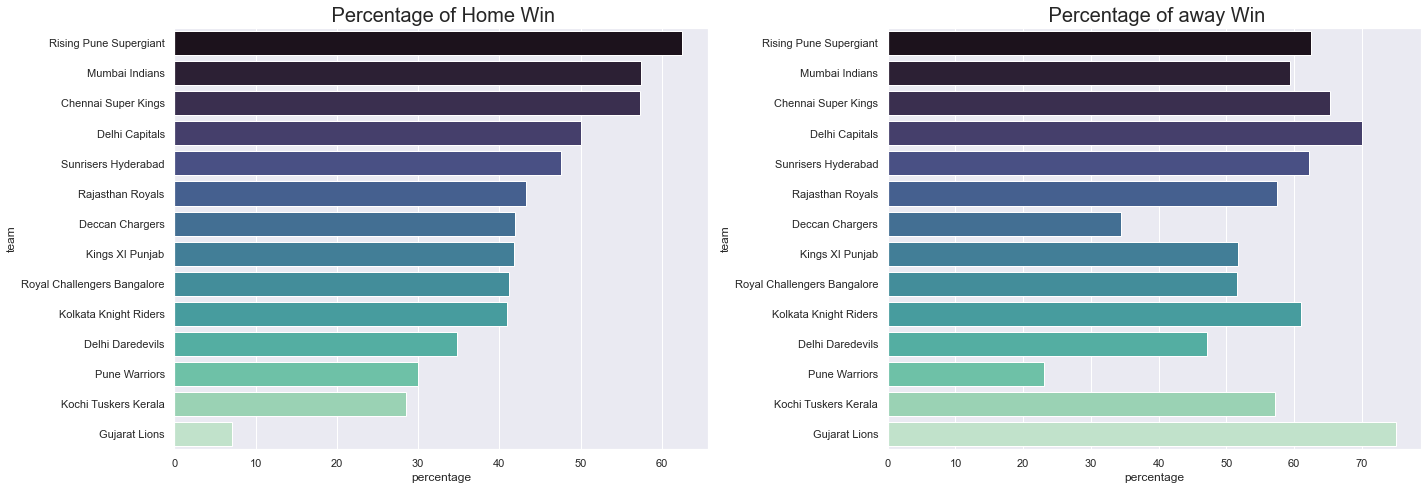

In [22]:


plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
sns.barplot(y='team',x='home_win_percentage',data=home_away ,palette='mako')
plt.title(' Percentage of Home Win',fontsize=20)
plt.xlabel('percentage')

plt.subplot(2,2,2)
sns.barplot(y='team',x='away_win_percentage',data=home_away ,palette='mako')
plt.xlabel('percentage')

plt.title(' Percentage of away Win',fontsize=20) 

plt.tight_layout()
plt.show()